In [1]:
import pandas as pd
from google.colab import drive
drive.mount("/content/drive")
dataset = pd.read_csv("/content/drive/My Drive/IIITNR_PROJECT/data.csv")

Mounted at /content/drive


In [2]:
dataset

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,24.141694,25.572342,26.011782,25.984342,0.160142,0.072171,0.041680,0.042701,0.044852,0.042222,...,1142.727068,0.000173,0.000169,0.000169,0.000169,0.013159,0.013007,0.012989,0.013012,Red soil
1,25.124429,26.607912,27.314094,27.290155,0.212591,0.131703,0.087046,0.091550,0.041760,0.038626,...,1217.970812,0.000143,0.000140,0.000138,0.000139,0.011964,0.011812,0.011766,0.011769,Red soil
2,25.124429,26.607912,27.314094,27.290155,0.212591,0.131703,0.087046,0.091550,0.041760,0.038626,...,1217.970812,0.000143,0.000140,0.000138,0.000139,0.011964,0.011812,0.011766,0.011769,Red soil
3,24.141694,25.572342,26.011782,25.984342,0.160142,0.072171,0.041680,0.042701,0.044852,0.042222,...,1142.727068,0.000173,0.000169,0.000169,0.000169,0.013159,0.013007,0.012989,0.013012,Red soil
4,21.085366,36.684982,42.747826,36.372711,0.858902,0.720834,0.634388,0.694166,0.210628,0.134561,...,3428.246337,0.008052,0.004122,0.002971,0.003800,0.089735,0.064201,0.054506,0.061645,Red soil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,23.002656,24.306926,25.101636,25.122024,0.562975,0.497148,0.453289,0.459698,0.047658,0.046799,...,1155.472742,0.000148,0.000146,0.000144,0.000143,0.012147,0.012073,0.011992,0.011950,Alluvial soil
1557,16.966723,16.834458,16.529494,16.931054,0.148447,0.159239,0.181681,0.145310,0.058666,0.059603,...,462.577564,0.000346,0.000349,0.000347,0.000351,0.018597,0.018678,0.018631,0.018727,Alluvial soil
1558,40.456790,43.867547,29.026246,31.113144,0.232904,0.154266,0.610504,0.523791,0.048027,0.035205,...,1987.470867,0.000274,0.000256,0.000344,0.000367,0.016565,0.016015,0.018547,0.019146,Alluvial soil
1559,20.743029,23.274921,24.465181,23.461793,0.596128,0.508363,0.463050,0.500767,0.056915,0.049051,...,951.163028,0.000156,0.000146,0.000141,0.000146,0.012481,0.012064,0.011872,0.012072,Alluvial soil


In [3]:
def correlation(data , threshold):
  col_corr = set()
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [4]:
col_feature = correlation(dataset.drop(columns = ['label'] , axis = 1) , 0.9)

In [5]:
len(set(col_feature))
col_feature

{'ASM_135',
 'ASM_45',
 'ASM_90',
 'contrast_0',
 'contrast_135',
 'contrast_45',
 'contrast_90',
 'dissimilarity_135',
 'dissimilarity_45',
 'dissimilarity_90',
 'energy_0',
 'energy_135',
 'energy_45',
 'energy_90',
 'homogeneity_135',
 'homogeneity_45',
 'homogeneity_90'}

In [6]:
dataset.drop(col_feature ,axis = 1 , inplace = True )

In [7]:
dataset

,dissimilarity_0,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,ASM_0,label
0,24.141694,0.160142,0.072171,0.041680,0.042701,0.044852,0.000173,Red soil
1,25.124429,0.212591,0.131703,0.087046,0.091550,0.041760,0.000143,Red soil
2,25.124429,0.212591,0.131703,0.087046,0.091550,0.041760,0.000143,Red soil
3,24.141694,0.160142,0.072171,0.041680,0.042701,0.044852,0.000173,Red soil
4,21.085366,0.858902,0.720834,0.634388,0.694166,0.210628,0.008052,Red soil
...,...,...,...,...,...,...,...,...
1556,23.002656,0.562975,0.497148,0.453289,0.459698,0.047658,0.000148,Alluvial soil
1557,16.966723,0.148447,0.159239,0.181681,0.145310,0.058666,0.000346,Alluvial soil
1558,40.456790,0.232904,0.154266,0.610504,0.523791,0.048027,0.000274,Alluvial soil
1559,20.743029,0.596128,0.508363,0.463050,0.500767,0.056915,0.000156,Alluvial soil


In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
# Extract features (X) and labels (y) from the DataFrame
X = dataset.drop(columns=['label'])  # Features
y = dataset['label']  # Labels

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)

(1248, 7)
(313, 7)


In [12]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2]
}


In [13]:
# Initialize the model
knn = KNeighborsClassifier()

In [14]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

In [15]:
# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [16]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Best parameters found:  {'algorithm': 'auto', 'leaf_size': 20, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


In [17]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [18]:
# Generate the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [19]:
# Print the results
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[106   2   3   2]
 [  1  71   0   4]
 [  0   1  56   0]
 [  2   2   0  63]]

Classification Report:
               precision    recall  f1-score   support

Alluvial soil       0.97      0.94      0.95       113
   Black Soil       0.93      0.93      0.93        76
    Clay soil       0.95      0.98      0.97        57
     Red soil       0.91      0.94      0.93        67

     accuracy                           0.95       313
    macro avg       0.94      0.95      0.95       313
 weighted avg       0.95      0.95      0.95       313



Visualizing Performance for Different Parameters

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [21]:
# List of values for n_neighbors to evaluate
n_neighbors_range = range(1, 20)


In [22]:
# Initialize lists to store results
mean_scores = []

In [23]:
# Perform cross-validation for each value of n_neighbors
for n in n_neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

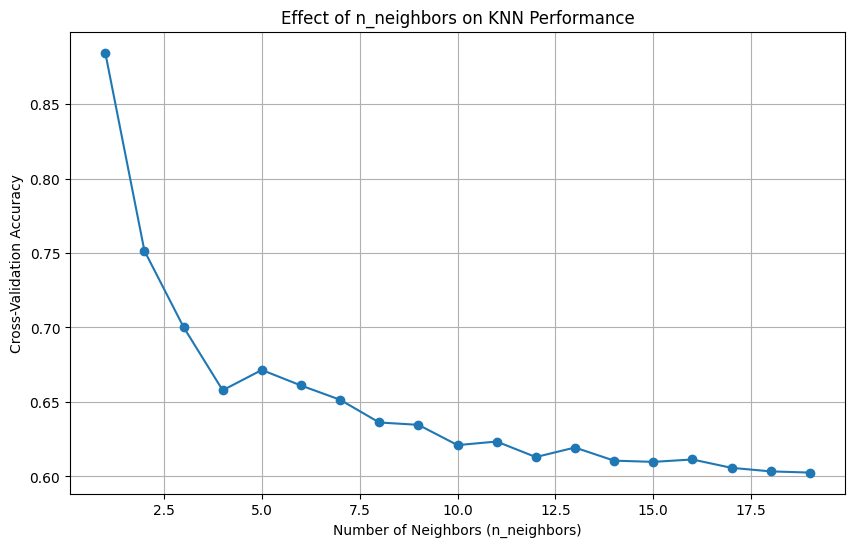

In [24]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_range, mean_scores, marker='o')
plt.title('Effect of n_neighbors on KNN Performance')
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.grid(True)
plt.show()